<a href="https://colab.research.google.com/github/sherinee/TSAI/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils

In [2]:
!pip install torchsummary
from torchsummary import summary

# Transformations

In [3]:
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-5.0, 5.0), fill=(1,)),
                                      # transforms.RandomAffine((-5.0,5.0),fillcolor=1),
                                       #transforms.RandomPerspective(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       ])
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       ])

# Load dataset

In [4]:
train = datasets.MNIST('./data', train=True, download=True,transform=train_transforms)
test = datasets.MNIST('./data', train=True, download=True,transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloaders: Test/Train dataset

In [5]:
SEED = 3

# is cuda available
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle = True, batch_size = 128, num_workers = 4,pin_memory = True) if cuda else dict(shuffle = True, batch_size = 64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, ** dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Data Statistics & Sample Data



[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
 - mean: 

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor(33.3184)
 - std: tensor(78.5675)
 - var: tensor(6172.8506)
torch.Size([128, 1, 28, 28])
torch.Size([128])


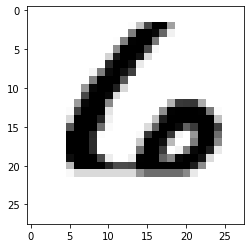

In [ ]:
# converting array into numpy from tensor
train_data = train.train_data
#train_data = train.transform(train.train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.Tensor.float(train_data).mean())
print(' - std:', torch.Tensor.float(train_data).std())
print(' - var:', torch.Tensor.float(train_data).var())

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[52].numpy().squeeze(), cmap='gray_r')


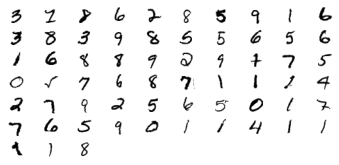

In [ ]:
figure = plt.figure()
num_of_images = 63
for index in range(1, num_of_images + 1):
    plt.subplot(10, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Data properties

In [ ]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                        transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


# Basic Model

In [9]:
class BatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-05, momentum=0.1, weight=True, bias=True):
        super().__init__(num_features, eps=eps, momentum=momentum)
        self.weight.data.fill_(1.0)
        self.bias.data.fill_(0.0)
        self.weight.requires_grad = weight
        self.bias.requires_grad = bias

class GhostBatchNorm(BatchNorm):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits
        self.register_buffer('running_mean', torch.zeros(num_features * self.num_splits))
        self.register_buffer('running_var', torch.ones(num_features * self.num_splits))

    def train(self, mode=True):
        if (self.training is True) and (mode is False):  # lazily collate stats when we are going to use them
            self.running_mean = torch.mean(self.running_mean.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
            self.running_var = torch.mean(self.running_var.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
        return super().train(mode)

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            return F.batch_norm(
                input.view(-1, C * self.num_splits, H, W), self.running_mean, self.running_var,
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W)
        else:
            return F.batch_norm(
                input, self.running_mean[:self.num_features], self.running_var[:self.num_features],
                self.weight, self.bias, False, self.momentum, self.eps)

In [10]:
class Net(nn.Module):
    def __init__(self, is_GBN = False,gbn_splits = 2):
        # if norm_type == "GN":
        #   norm_technique = torch.nn.BatchNorm2d(10)
        # elif norm_type == "LN":
        #   norm_technique = torch.nn.LayerNorm(20,10,5)
        # elif norm_type == "BN":
        #   norm_technique = torch.nn.GroupNorm(6,6)

        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(), 
            # norm_technique
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 28 output_size = 26 receptive_field = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 26 output_size = 24 receptive_field = 5

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(16, gbn_splits) if is_GBN else nn.BatchNorm2d(16)
        ) # input_size = 12 output_size = 10 receptive_field = 5

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 12 output_size = 10 receptive_field = 5


        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # input_size = 24 output_size = 12 receptive_field = 

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 5 output_size = 3 receptive_field = 13

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(16, gbn_splits) if is_GBN else nn.BatchNorm2d(16)
        ) # input_size = 5 output_size = 3 receptive_field = 13

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(16, gbn_splits) if is_GBN else nn.BatchNorm2d(16)
        ) # input_size = 5 output_size = 3 receptive_field = 13

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 5 output_size = 3 receptive_field = 13

        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            GhostBatchNorm(10, gbn_splits) if is_GBN else nn.BatchNorm2d(10)
        ) # input_size = 5 output_size = 3 receptive_field = 13

        # OUTPUT BLOCK
        self.convblock10 = nn.Sequential(
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # input_size = 5 output_size = 1  receptive_field = 29
        

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.pool1(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.convblock9(x)
        x = self.convblock10(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)   
        
    

In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
  
model = Net(is_GBN=True,gbn_splits=2).to(device)
    
print(summary(model, input_size=(1,28,28)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
    GhostBatchNorm-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
    GhostBatchNorm-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 16, 22, 22]           1,440
              ReLU-8           [-1, 16, 22, 22]               0
    GhostBatchNorm-9           [-1, 16, 22, 22]              32
           Conv2d-10           [-1, 10, 22, 22]             160
             ReLU-11           [-1, 10, 22, 22]               0
   GhostBatchNorm-12           [-1, 10, 22, 22]              20
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


#Training & Testing

In [ ]:
from tqdm import tqdm


def train(model, device, train_loader, optimizer, epoch, train_losses,train_acc, l1_loss_flag, lamda_l1 = 0.0001):
  
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    
    if l1_loss_flag:
       l1 = 0
       for p in model.parameters():
         l1 = l1+p.abs().sum()
       loss += lamda_l1 * l1
      
    train_losses.append(loss)#.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)


def test(model, device, test_loader,test_losses, test_acc):

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

    


# Train & Test model

In [ ]:
def run_model(model,device,optimiser, EPOCHS = 1,is_L1_loss = False, is_GBN = False,gbn_splits=2):
  
  train_losses=[]
  train_acc=[]
  test_losses=[]
  test_acc=[]
    
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch+1)
      train(model, device, train_loader, optimizer,epoch, train_losses,train_acc, is_L1_loss, lamda_l1=0.0001)
      test(model, device, test_loader,test_losses, test_acc)
        
  return {'train_loss':train_losses,  'train_acc':train_acc,  'test_loss':test_losses,  'test_acc':test_acc}

In [ ]:
check_cond = ["L1+BN", "L2+BN", "L1+L2+BN","GBN","L1+L2+GBN"]
EPOCHS = 25
data = {}
for chck in check_cond:
  print("\nModel Running for:",chck)
  
  is_l1_loss = 'L1' in chck   
  is_gbn = 'GBN' in chck
  gbn_splits = 4

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  
  model = Net(is_gbn,gbn_splits).to(device)
    
  if chck in [ "L2+BN", "L1+L2+BN","L1+L2+GBN"]:
    optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum=0, weight_decay=0,nesterov=False)
  else:
    optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum=0.9)
  
  data[chck] = run_model(model,device,optimizer,EPOCHS, is_l1_loss, is_gbn, gbn_splits)
  torch.save(model.state_dict(), chck+'.pth') 

  0%|          | 0/469 [00:00<?, ?it/s]


Model Running for: L1+BN
EPOCH: 1


Loss=0.1806875765323639 Batch_id=468 Accuracy=91.73: 100%|██████████| 469/469 [00:20<00:00, 22.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0817, Accuracy: 58650/60000 (97.75%)

EPOCH: 2


Loss=0.11619462072849274 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:20<00:00, 22.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0552, Accuracy: 59073/60000 (98.45%)

EPOCH: 3


Loss=0.09305556863546371 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:20<00:00, 22.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0432, Accuracy: 59228/60000 (98.71%)

EPOCH: 4


Loss=0.15011358261108398 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:20<00:00, 22.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0399, Accuracy: 59315/60000 (98.86%)

EPOCH: 5


Loss=0.0938643366098404 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:20<00:00, 22.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 59422/60000 (99.04%)

EPOCH: 6


Loss=0.08024080097675323 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:20<00:00, 22.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0366, Accuracy: 59321/60000 (98.87%)

EPOCH: 7


Loss=0.07697060704231262 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:20<00:00, 23.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 59582/60000 (99.30%)

EPOCH: 8


Loss=0.07826350629329681 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:20<00:00, 23.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 59531/60000 (99.22%)

EPOCH: 9


Loss=0.06733652204275131 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:20<00:00, 23.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 59603/60000 (99.34%)

EPOCH: 10


Loss=0.07071218639612198 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:20<00:00, 23.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 59570/60000 (99.28%)

EPOCH: 11


Loss=0.08847583830356598 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:20<00:00, 23.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 59522/60000 (99.20%)

EPOCH: 12


Loss=0.06541362404823303 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:20<00:00, 23.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 59571/60000 (99.28%)

EPOCH: 13


Loss=0.07619187980890274 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:20<00:00, 22.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 59584/60000 (99.31%)

EPOCH: 14


Loss=0.07389800250530243 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:20<00:00, 23.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 59690/60000 (99.48%)

EPOCH: 15


Loss=0.061327673494815826 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 23.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 59544/60000 (99.24%)

EPOCH: 16


Loss=0.06812584400177002 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:20<00:00, 23.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 59588/60000 (99.31%)

EPOCH: 17


Loss=0.1376115083694458 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:20<00:00, 23.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 59626/60000 (99.38%)

EPOCH: 18


Loss=0.06333785504102707 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:20<00:00, 23.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 59545/60000 (99.24%)

EPOCH: 19


Loss=0.08464118093252182 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:20<00:00, 23.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 59551/60000 (99.25%)

EPOCH: 20


Loss=0.07155781984329224 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:20<00:00, 23.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 59613/60000 (99.36%)

EPOCH: 21


Loss=0.06404277682304382 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:20<00:00, 23.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 59696/60000 (99.49%)

EPOCH: 22


Loss=0.06114571914076805 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:20<00:00, 23.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 59647/60000 (99.41%)

EPOCH: 23


Loss=0.08990789949893951 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:20<00:00, 23.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 59613/60000 (99.36%)

EPOCH: 24


Loss=0.09097021818161011 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:20<00:00, 23.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 59726/60000 (99.54%)

EPOCH: 25


Loss=0.14812470972537994 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:20<00:00, 23.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 59657/60000 (99.43%)


Model Running for: L2+BN
EPOCH: 1


Loss=0.3173085153102875 Batch_id=468 Accuracy=82.39: 100%|██████████| 469/469 [00:18<00:00, 25.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2914, Accuracy: 56124/60000 (93.54%)

EPOCH: 2


Loss=0.17506520450115204 Batch_id=468 Accuracy=94.91: 100%|██████████| 469/469 [00:18<00:00, 25.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1586, Accuracy: 57892/60000 (96.49%)

EPOCH: 3


Loss=0.18145634233951569 Batch_id=468 Accuracy=96.60: 100%|██████████| 469/469 [00:18<00:00, 25.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1064, Accuracy: 58459/60000 (97.43%)

EPOCH: 4


Loss=0.06862132996320724 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:18<00:00, 25.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0809, Accuracy: 58796/60000 (97.99%)

EPOCH: 5


Loss=0.12195467948913574 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:18<00:00, 25.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0765, Accuracy: 58954/60000 (98.26%)

EPOCH: 6


Loss=0.059327151626348495 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0566, Accuracy: 59134/60000 (98.56%)

EPOCH: 7


Loss=0.19185300171375275 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:18<00:00, 25.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0544, Accuracy: 59160/60000 (98.60%)

EPOCH: 8


Loss=0.02511507272720337 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:18<00:00, 25.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0435, Accuracy: 59362/60000 (98.94%)

EPOCH: 9


Loss=0.07619112730026245 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:18<00:00, 25.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 59378/60000 (98.96%)

EPOCH: 10


Loss=0.041329097002744675 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:18<00:00, 25.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 59360/60000 (98.93%)

EPOCH: 11


Loss=0.07426338642835617 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:18<00:00, 25.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0708, Accuracy: 58732/60000 (97.89%)

EPOCH: 12


Loss=0.08229696750640869 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 59484/60000 (99.14%)

EPOCH: 13


Loss=0.04504740238189697 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:18<00:00, 25.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 59512/60000 (99.19%)

EPOCH: 14


Loss=0.04692453145980835 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:18<00:00, 25.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 59609/60000 (99.35%)

EPOCH: 15


Loss=0.05314768850803375 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 59535/60000 (99.22%)

EPOCH: 16


Loss=0.018250953406095505 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 59642/60000 (99.40%)

EPOCH: 17


Loss=0.06953314691781998 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:17<00:00, 26.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 59607/60000 (99.34%)

EPOCH: 18


Loss=0.06420918554067612 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:18<00:00, 25.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 59630/60000 (99.38%)

EPOCH: 19


Loss=0.010065198875963688 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:18<00:00, 25.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 59727/60000 (99.55%)

EPOCH: 20


Loss=0.016617724671959877 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:18<00:00, 25.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 59751/60000 (99.58%)

EPOCH: 21


Loss=0.034737180918455124 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:17<00:00, 26.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 59700/60000 (99.50%)

EPOCH: 22


Loss=0.028787339106202126 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:17<00:00, 26.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 59730/60000 (99.55%)

EPOCH: 23


Loss=0.012187488377094269 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 59775/60000 (99.62%)

EPOCH: 24


Loss=0.07952067255973816 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:17<00:00, 26.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 59772/60000 (99.62%)

EPOCH: 25


Loss=0.008920046500861645 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:17<00:00, 26.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0135, Accuracy: 59846/60000 (99.74%)


Model Running for: L1+L2+BN
EPOCH: 1


Loss=0.48952144384384155 Batch_id=468 Accuracy=81.56: 100%|██████████| 469/469 [00:19<00:00, 24.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2757, Accuracy: 56578/60000 (94.30%)

EPOCH: 2


Loss=0.2168220579624176 Batch_id=468 Accuracy=95.35: 100%|██████████| 469/469 [00:19<00:00, 24.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1407, Accuracy: 58101/60000 (96.83%)

EPOCH: 3


Loss=0.22501371800899506 Batch_id=468 Accuracy=96.75: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0986, Accuracy: 58608/60000 (97.68%)

EPOCH: 4


Loss=0.1229197233915329 Batch_id=468 Accuracy=97.51: 100%|██████████| 469/469 [00:19<00:00, 23.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0791, Accuracy: 58820/60000 (98.03%)

EPOCH: 5


Loss=0.1481679379940033 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:20<00:00, 23.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0757, Accuracy: 58917/60000 (98.19%)

EPOCH: 6


Loss=0.08217375725507736 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0578, Accuracy: 59144/60000 (98.57%)

EPOCH: 7


Loss=0.1985044628381729 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:19<00:00, 23.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0763, Accuracy: 58923/60000 (98.20%)

EPOCH: 8


Loss=0.11547259241342545 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:19<00:00, 24.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0527, Accuracy: 59167/60000 (98.61%)

EPOCH: 9


Loss=0.10781353712081909 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:19<00:00, 24.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0412, Accuracy: 59370/60000 (98.95%)

EPOCH: 10


Loss=0.09401974081993103 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:20<00:00, 23.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 59437/60000 (99.06%)

EPOCH: 11


Loss=0.16444319486618042 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:20<00:00, 22.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 59435/60000 (99.06%)

EPOCH: 12


Loss=0.07291385531425476 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:19<00:00, 23.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0354, Accuracy: 59461/60000 (99.10%)

EPOCH: 13


Loss=0.08833028376102448 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:19<00:00, 23.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 59495/60000 (99.16%)

EPOCH: 14


Loss=0.07016628980636597 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:19<00:00, 23.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 59588/60000 (99.31%)

EPOCH: 15


Loss=0.07021617144346237 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:19<00:00, 23.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 59600/60000 (99.33%)

EPOCH: 16


Loss=0.10416330397129059 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:19<00:00, 23.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 59649/60000 (99.42%)

EPOCH: 17


Loss=0.08606891334056854 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:19<00:00, 23.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 59692/60000 (99.49%)

EPOCH: 18


Loss=0.10559527575969696 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:19<00:00, 23.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 59637/60000 (99.39%)

EPOCH: 19


Loss=0.08443377166986465 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 59696/60000 (99.49%)

EPOCH: 20


Loss=0.11283177137374878 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:19<00:00, 24.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 59742/60000 (99.57%)

EPOCH: 21


Loss=0.0655422955751419 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 24.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 59771/60000 (99.62%)

EPOCH: 22


Loss=0.06001865491271019 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:19<00:00, 24.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 59758/60000 (99.60%)

EPOCH: 23


Loss=0.08777010440826416 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:19<00:00, 24.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 59723/60000 (99.54%)

EPOCH: 24


Loss=0.07184970378875732 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:19<00:00, 24.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0144, Accuracy: 59801/60000 (99.67%)

EPOCH: 25


Loss=0.05734909698367119 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:19<00:00, 23.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 59809/60000 (99.68%)


Model Running for: GBN
EPOCH: 1


Loss=0.08785995841026306 Batch_id=468 Accuracy=90.83: 100%|██████████| 469/469 [00:18<00:00, 25.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0954, Accuracy: 58348/60000 (97.25%)

EPOCH: 2


Loss=0.0416782982647419 Batch_id=468 Accuracy=97.16: 100%|██████████| 469/469 [00:18<00:00, 25.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0575, Accuracy: 58979/60000 (98.30%)

EPOCH: 3


Loss=0.05257365107536316 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0537, Accuracy: 59017/60000 (98.36%)

EPOCH: 4


Loss=0.021946629509329796 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:18<00:00, 25.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 59289/60000 (98.81%)

EPOCH: 5


Loss=0.06698920577764511 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:18<00:00, 25.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 59340/60000 (98.90%)

EPOCH: 6


Loss=0.010561153292655945 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:18<00:00, 24.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 59389/60000 (98.98%)

EPOCH: 7


Loss=0.01927795074880123 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:18<00:00, 25.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 59479/60000 (99.13%)

EPOCH: 8


Loss=0.0682225152850151 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:18<00:00, 25.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 59542/60000 (99.24%)

EPOCH: 9


Loss=0.022513920441269875 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:18<00:00, 25.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 59532/60000 (99.22%)

EPOCH: 10


Loss=0.04335999861359596 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:18<00:00, 25.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 59627/60000 (99.38%)

EPOCH: 11


Loss=0.005298575386404991 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:18<00:00, 25.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 59586/60000 (99.31%)

EPOCH: 12


Loss=0.15435640513896942 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:18<00:00, 25.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 59629/60000 (99.38%)

EPOCH: 13


Loss=0.0417323112487793 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:18<00:00, 25.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 59674/60000 (99.46%)

EPOCH: 14


Loss=0.009295866824686527 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:18<00:00, 24.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 59641/60000 (99.40%)

EPOCH: 15


Loss=0.06430255621671677 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:18<00:00, 24.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 59692/60000 (99.49%)

EPOCH: 16


Loss=0.04053466394543648 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:18<00:00, 25.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 59633/60000 (99.39%)

EPOCH: 17


Loss=0.0011205656919628382 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:18<00:00, 24.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 59731/60000 (99.55%)

EPOCH: 18


Loss=0.05110499635338783 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:18<00:00, 25.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 59693/60000 (99.49%)

EPOCH: 19


Loss=0.055852849036455154 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 59694/60000 (99.49%)

EPOCH: 20


Loss=0.005150896031409502 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:18<00:00, 25.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 59786/60000 (99.64%)

EPOCH: 21


Loss=0.0033049536868929863 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:18<00:00, 25.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 59774/60000 (99.62%)

EPOCH: 22


Loss=0.014575122855603695 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:18<00:00, 25.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 59762/60000 (99.60%)

EPOCH: 23


Loss=0.07679061591625214 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:18<00:00, 25.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 59785/60000 (99.64%)

EPOCH: 24


Loss=0.02107330970466137 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:18<00:00, 25.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 59817/60000 (99.69%)

EPOCH: 25


Loss=0.03788766637444496 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:18<00:00, 24.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 59804/60000 (99.67%)


Model Running for: L1+L2+GBN
EPOCH: 1


Loss=0.31571850180625916 Batch_id=468 Accuracy=80.12: 100%|██████████| 469/469 [00:21<00:00, 21.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2612, Accuracy: 56551/60000 (94.25%)

EPOCH: 2


Loss=0.2267976701259613 Batch_id=468 Accuracy=94.61: 100%|██████████| 469/469 [00:20<00:00, 23.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1454, Accuracy: 58020/60000 (96.70%)

EPOCH: 3


Loss=0.1521565169095993 Batch_id=468 Accuracy=96.23: 100%|██████████| 469/469 [00:20<00:00, 22.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1038, Accuracy: 58557/60000 (97.59%)

EPOCH: 4


Loss=0.19035156071186066 Batch_id=468 Accuracy=96.98: 100%|██████████| 469/469 [00:20<00:00, 22.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0778, Accuracy: 58806/60000 (98.01%)

EPOCH: 5


Loss=0.12018026411533356 Batch_id=468 Accuracy=97.45: 100%|██████████| 469/469 [00:20<00:00, 22.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0685, Accuracy: 58998/60000 (98.33%)

EPOCH: 6


Loss=0.17075598239898682 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:20<00:00, 22.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0639, Accuracy: 59000/60000 (98.33%)

EPOCH: 7


Loss=0.21514686942100525 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:20<00:00, 22.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0560, Accuracy: 59157/60000 (98.59%)

EPOCH: 8


Loss=0.09550660848617554 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:20<00:00, 22.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0457, Accuracy: 59309/60000 (98.85%)

EPOCH: 9


Loss=0.10177011042833328 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:20<00:00, 22.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 59345/60000 (98.91%)

EPOCH: 10


Loss=0.13964253664016724 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:20<00:00, 22.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0391, Accuracy: 59408/60000 (99.01%)

EPOCH: 11


Loss=0.09622540324926376 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:20<00:00, 22.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 59423/60000 (99.04%)

EPOCH: 12


Loss=0.08657452464103699 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:20<00:00, 22.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 59414/60000 (99.02%)

EPOCH: 13


Loss=0.15872187912464142 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:20<00:00, 22.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0310, Accuracy: 59494/60000 (99.16%)

EPOCH: 14


Loss=0.16631025075912476 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:20<00:00, 23.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 59535/60000 (99.22%)

EPOCH: 15


Loss=0.06153560429811478 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:20<00:00, 22.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 59554/60000 (99.26%)

EPOCH: 16


Loss=0.10004708915948868 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:20<00:00, 23.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 59493/60000 (99.16%)

EPOCH: 17


Loss=0.09236150979995728 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:20<00:00, 23.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 59516/60000 (99.19%)

EPOCH: 18


Loss=0.12561151385307312 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:20<00:00, 22.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 59630/60000 (99.38%)

EPOCH: 19


Loss=0.12337626516819 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:20<00:00, 23.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 59655/60000 (99.42%)

EPOCH: 20


Loss=0.09146074950695038 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:20<00:00, 23.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 59586/60000 (99.31%)

EPOCH: 21


Loss=0.08678951859474182 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:20<00:00, 23.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 59592/60000 (99.32%)

EPOCH: 22


Loss=0.09856969118118286 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:20<00:00, 23.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 59689/60000 (99.48%)

EPOCH: 23


Loss=0.08077652752399445 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:20<00:00, 22.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 59682/60000 (99.47%)

EPOCH: 24


Loss=0.08237969875335693 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:20<00:00, 23.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 59683/60000 (99.47%)

EPOCH: 25


Loss=0.07489049434661865 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 22.74it/s]



Test set: Average loss: 0.0175, Accuracy: 59757/60000 (99.59%)



# Ploting model result

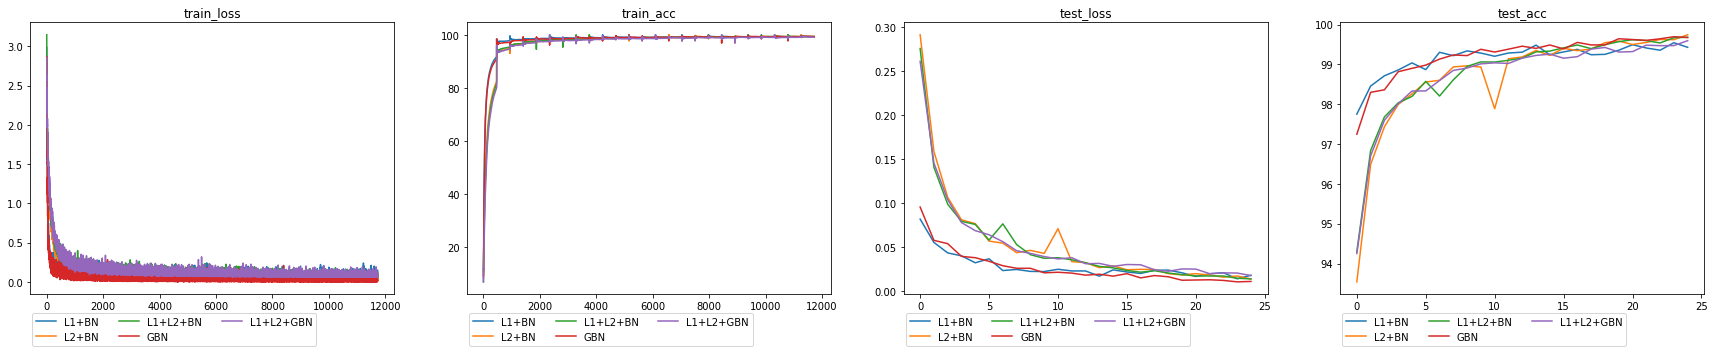

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(30,5))
axs_pos = {'train_loss':(0),
'train_acc':(1),
'test_loss':(2),
'test_acc':(3)}
for d in data:
  for i in data[d]:
    ax = axs[axs_pos[i]]
    ax.plot(data[d][i],label=d)
    ax.legend(bbox_to_anchor=(.8, -.05),ncol=3)#,#bbox_transform=ax.transAxes)
    ax.set_title(i)

# Misclassified Images for GBN Model

In [ ]:
is_gbn = True
gbn_splits = 4

gbn_model = Net(is_gbn,gbn_splits)#.to(device)
gbn_model.load_state_dict(torch.load('GBN.pth'))

<All keys matched successfully>

In [ ]:
test_images = []
target_labels = []
target_predictions = []
for img, target in test_loader:
  prediction = torch.argmax(gbn_model(img), dim=1)
  test_images.append( img )
  target_labels.append( target )
  target_predictions.append( prediction )

In [ ]:
test_images = torch.cat(test_images)
target_labels = torch.cat(target_labels)
target_predictions = torch.cat(target_predictions)
misclassified_index = target_labels.ne(target_predictions).numpy()
test_images = test_images[misclassified_index]
target_labels = target_labels[misclassified_index]
target_predictions = target_predictions[misclassified_index]

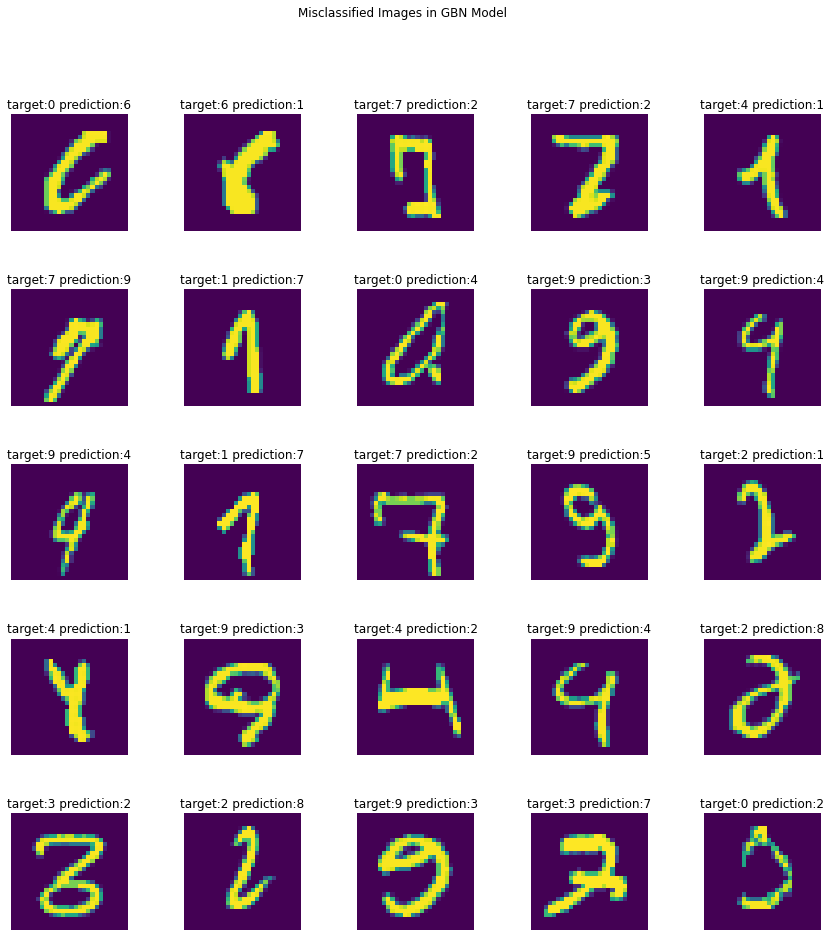

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Misclassified Images in GBN Model')

for ax, image, target, prediction in zip(axes.flatten(), test_images,target_labels,target_predictions):
    ax.imshow(image[0])
    ax.set(title='target:{t} prediction:{p}'.format(t=target.item(),p=prediction.item()))
    ax.axis('off')